In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('covid.csv')

In [3]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

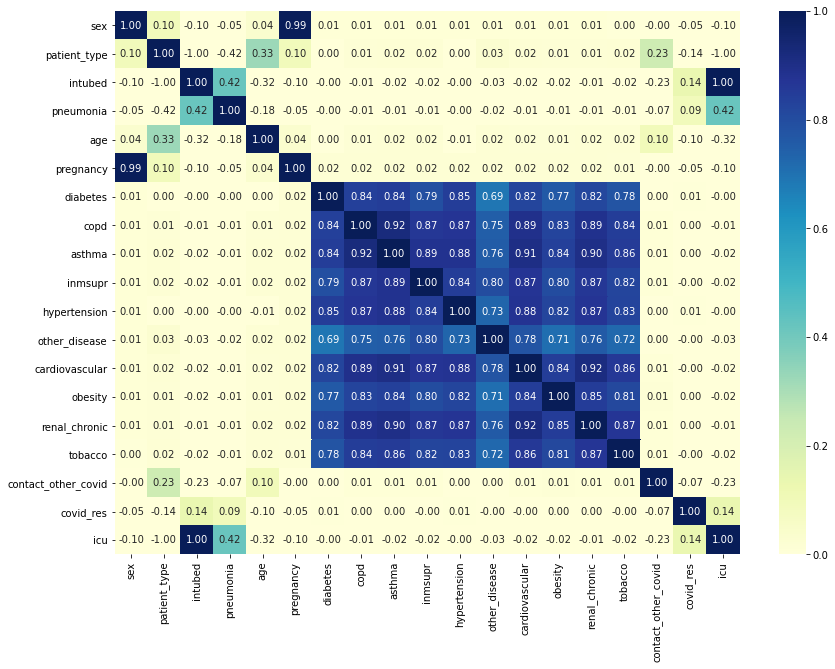

In [4]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop('date_died', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

### Transformando as datas de morte missing em valores falsos, e datas de morte verdadeiras para true

As datas nulas ou missing são representadas como '9999-99-99', todos os campos que tiverem esse valor, teremos que transformar em False, ou seja, a pessoa não veio a obito, caso exista uma data real transformamos o valor do campo em True, que no caso a pessoa veio a obito

In [5]:
def toBool(value):
    if value in'9999-99-99':
        return 0
    else:
        return 1

In [6]:
dates = df['date_died'].values
died_yes_no = np.array(list(map(toBool, dates)))

In [7]:
df['died'] = died_yes_no

### Retiramos as colunas que não são interessantes como atributo de treinamento.

In [8]:
df = df.drop(columns=['id', 'entry_date', 'date_symptoms', 'date_died'], axis=1)

In [9]:
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,0
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,0
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,0
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,0
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,1


### Separando atributos de treinamento da variável target

In [12]:
atributos = df.columns.drop('died')

In [13]:
target = ['died']

In [14]:
X = df[atributos].values
Y = df[target].values

### Tratando missing ocultos

Na documentação do dataset, valores missing estão representados como 97, 98, 99, menos na coluna idade.

In [15]:
preenche_0 = SimpleImputer(missing_values = 97, strategy = "most_frequent")
preenche_1 = SimpleImputer(missing_values = 98, strategy = "most_frequent")
preenche_2 = SimpleImputer(missing_values = 99, strategy = "most_frequent")

In [16]:
X = preenche_0.fit_transform(X)
X = preenche_1.fit_transform(X)
X = preenche_2.fit_transform(X)

### Análise de componentes principais (PCA)

In [17]:
pca = PCA(n_components = 3)

In [18]:
pca.fit(X)

PCA(n_components=3)

In [19]:
pca.explained_variance_

array([2.76565868e+02, 4.39738979e-01, 2.64183126e-01])

In [20]:
pca.explained_variance_ratio_

array([9.93677131e-01, 1.57994394e-03, 9.49187016e-04])

In [21]:
pca.components_

array([[ 1.11371605e-03,  8.02852129e-03, -7.25720973e-04,
        -6.13295953e-03,  9.99875276e-01,  3.65877811e-04,
        -6.59485799e-03, -1.30421580e-03,  2.79299297e-04,
        -2.27620926e-04, -8.72613487e-03, -3.87572982e-04,
        -1.21857589e-03, -1.88902435e-03, -8.68221652e-04,
        -2.44308012e-04,  1.02935005e-03, -4.07905096e-03,
        -5.27668121e-04],
       [-9.60225923e-02, -1.44627132e-01,  1.95696031e-02,
         1.31826880e-01,  6.70521290e-03,  5.56632328e-05,
         4.07557392e-02,  1.10656524e-03, -2.75951369e-03,
         6.91188371e-04,  3.11284732e-02,  1.40885360e-03,
         1.37109645e-03,  4.47009595e-02,  4.71095565e-03,
        -1.45798090e-04, -1.89996259e-03,  9.73208879e-01,
         1.59273330e-02],
       [ 8.04288859e-01,  3.57573600e-01, -4.52570428e-02,
        -2.96194619e-01, -6.45721967e-03,  8.44819510e-03,
        -8.65617458e-02, -9.96635677e-03,  1.53264622e-02,
        -1.03663846e-02, -6.97491110e-02, -1.64666790e-03,
    

In [22]:
X = pca.transform(X)

In [23]:
new_df = pd.DataFrame(X, columns=['pc1', 'pc2', 'pc3'])

In [24]:
new_df['target'] = Y

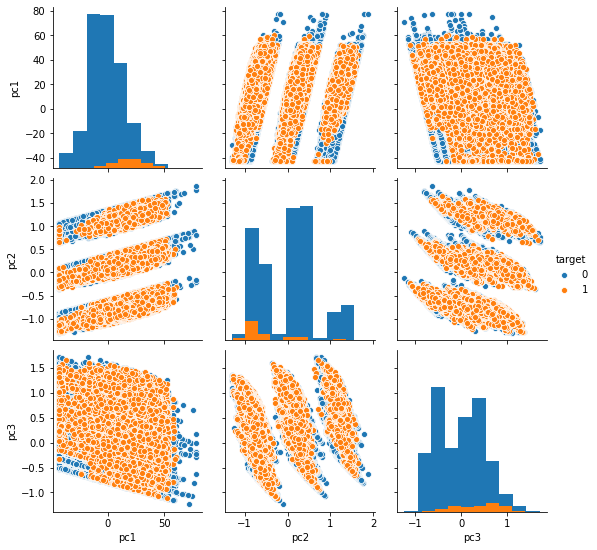

In [25]:
sns.pairplot(new_df, vars = ['pc1', 'pc2', 'pc3'], hue='target', diag_kind = 'hist')
plt.show()

### Separando dados de treino e dados de teste

In [26]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.25, random_state = 2)

In [27]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(new_df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(new_df.index)) * 100))

75.00% nos dados de treino
25.00% nos dados de teste


### Criando Modelo usando o algoritmo de classificação de Naive Bayes

In [28]:
modelo_v1 = GaussianNB()

In [29]:
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

### Verificando acurácia do modelo

In [30]:
nb_predict_test = modelo_v1.predict(X_teste)

In [31]:
print('X_teste ', X_teste.shape)
print('X_treino ', X_treino.shape)
print('Y_teste ', Y_teste.shape)
print('Y_treino ', Y_treino.shape)

X_teste  (141651, 3)
X_treino  (424951, 3)
Y_teste  (141651, 1)
Y_treino  (424951, 1)


In [32]:
Y_treino.shape

(424951, 1)

In [33]:
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Acurácia: 0.9355


### Matriz de confusão

In [34]:
metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])

array([[  1707,   7522],
       [  1618, 130804]], dtype=int64)

### Curva ROC

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, nb_predict_test)
metrics.auc(fpr, tpr)

0.5863709686065074

In [36]:
modelo_v1.score(X_teste, Y_teste)

0.9354752172593205